<a href="https://colab.research.google.com/github/Daz-Riza-Seriog/Tensorflow_ML/blob/main/2-Customise%20your%20Models/2-%20Week%202/7-Training%20with%20Datasets/Training_with_DataSets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


# Data Pipeline

 ## Coding tutorials
 #### [1. Keras datasets](#coding_tutorial_1)
 #### [2. Dataset generators](#coding_tutorial_2)
 #### [3. Keras image data augmentation](#coding_tutorial_3)
 #### [4. The Dataset class](#coding_tutorial_4)
 #### [5. Training with Datasets](#coding_tutorial_5)

***
<a id="coding_tutorial_5"></a>
## Training with Datasets

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

#### Load the UCI Bank Marketing Dataset

#### Import the data

The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=1cNtP4iDyGhF620ZbmJdmJWYQrRgJTCum

You should store these files in Drive for use in this Colab notebook.

In [ ]:
# Install the PyDrive wrapper & import libraries.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# choose a local (colab) directory to store the data.
local_download_path = '/content/bank'
try:
    os.makedirs(local_download_path)
except: pass

# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile(
    {'q': "'1cNtP4iDyGhF620ZbmJdmJWYQrRgJTCum' in parents"}).GetList()  #use your own folder ID here

for f in file_list:
    # 3. Create & download by id.
    print('title: %s, id: %s' % (f['title'], f['id']))
    fname = f['title']
    print('downloading to {}'.format(fname))
    f_ = drive.CreateFile({'id': f['id']})
    f_.GetContentFile("{}/{}".format(local_download_path,fname))

title: bank-full.csv, id: 1nKvYzcXlEds31FCVaT9INPrbJbn3dVz-
downloading to bank-full.csv
title: bank.csv, id: 1OW-otGH9zbmIaVGFEFwDFlTSyVvckgHH
downloading to bank.csv
title: bank-names.txt, id: 1yUYTwg57-0dmKZHvDbY5hDbbhkfi5YRs
downloading to bank-names.txt


In [ ]:
# Load the CSV file into a pandas DataFrame
# Please use your own path once you have downloaded the dataset and mounted your Drive

bank_dataframe = pd.read_csv('/content/bank/bank-full.csv', delimiter=';')

In [ ]:
# Show the head of the DataFrame

bank_dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# Print the shape of the DataFrame

print(bank_dataframe.shape)

(45211, 17)


In [ ]:
# Select features from the DataFrame

features = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
            'loan', 'contact', 'campaign', 'pdays', 'poutcome']
labels = ['y']

bank_dataframe = bank_dataframe.filter(features + labels)

In [ ]:
# Show the head of the DataFrame

bank_dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,1,-1,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,1,-1,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,1,-1,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,1,-1,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,1,-1,unknown,no


#### Preprocess the data

In [ ]:
# Convert the categorical features in the DataFrame to one-hot encodings

from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
categorical_features = ['default', 'housing', 'job', 'loan', 'education', 'contact', 'poutcome']

for feature in categorical_features:
    bank_dataframe[feature] = tuple(encoder.fit_transform(bank_dataframe[feature]))

In [ ]:
# Show the head of the DataFrame

bank_dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,poutcome,y
0,58,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",married,"[0, 0, 1, 0]",[0],2143,[1],[0],"[0, 0, 1]",1,-1,"[0, 0, 0, 1]",no
1,44,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]",single,"[0, 1, 0, 0]",[0],29,[1],[0],"[0, 0, 1]",1,-1,"[0, 0, 0, 1]",no
2,33,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",married,"[0, 1, 0, 0]",[0],2,[1],[1],"[0, 0, 1]",1,-1,"[0, 0, 0, 1]",no
3,47,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",married,"[0, 0, 0, 1]",[0],1506,[1],[0],"[0, 0, 1]",1,-1,"[0, 0, 0, 1]",no
4,33,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",single,"[0, 0, 0, 1]",[0],1,[0],[0],"[0, 0, 1]",1,-1,"[0, 0, 0, 1]",no


*N.B. The below cell has been updated to correct the name of a variable and differs from the Coding Tutorial video.*

In [ ]:
# Shuffle the DataFrame

bank_dataframe = bank_dataframe.sample(frac=1).reset_index(drop=True)

#### Create the Dataset object

*N.B. Please use ``bank_dataframe.to_dict(orient='list')`` to convert the correct dataframe to a dictionary suitable for use in the ``from_tensor_slices`` function, rather than ``dict(dataframe)`` as specified in the coding tutorial video.*

In [ ]:
# Convert the DataFrame to a Dataset

bank_dataset = tf.data.Dataset.from_tensor_slices(bank_dataframe.to_dict(orient="list"))

In [ ]:
# Inspect the Dataset object

bank_dataset.element_spec

{'age': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'job': TensorSpec(shape=(12,), dtype=tf.int64, name=None),
 'marital': TensorSpec(shape=(), dtype=tf.string, name=None),
 'education': TensorSpec(shape=(4,), dtype=tf.int64, name=None),
 'default': TensorSpec(shape=(1,), dtype=tf.int64, name=None),
 'balance': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'housing': TensorSpec(shape=(1,), dtype=tf.int64, name=None),
 'loan': TensorSpec(shape=(1,), dtype=tf.int64, name=None),
 'contact': TensorSpec(shape=(3,), dtype=tf.int64, name=None),
 'campaign': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'pdays': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'poutcome': TensorSpec(shape=(4,), dtype=tf.int64, name=None),
 'y': TensorSpec(shape=(), dtype=tf.string, name=None)}

#### Filter the Dataset

In [ ]:
# First check that there are records in the dataset for non-married individuals

def check_divorced():
    bank_dataset_iterable = iter(bank_dataset)
    for x in bank_dataset_iterable:
        if x['marital'] != 'divorced':
            print('Found a person with marital status: {}'.format(x['marital']))
            return
    print('No non-divorced people were found!')

check_divorced()

Found a person with marital status: b'married'


In [ ]:
# Filter the Dataset to retain only entries with a 'divorced' marital status

bank_dataset = bank_dataset.filter(lambda x : tf.equal(x['marital'], tf.constant([b'divorced']))[0] )

In [ ]:
# Check the records in the dataset again

check_divorced()

No non-divorced people were found!


#### Map a function over the dataset

In [ ]:
# Convert the label ('y') to an integer instead of 'yes' or 'no'

def map_label(x):
  x["y"] = 0 if (x["y"] == tf.constant([b'no'], dtype=tf.string)) else 1
  return x

bank_dataset = bank_dataset.map(map_label)

In [ ]:
# Inspect the Dataset object

bank_dataset.element_spec

{'age': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'job': TensorSpec(shape=(12,), dtype=tf.int64, name=None),
 'marital': TensorSpec(shape=(), dtype=tf.string, name=None),
 'education': TensorSpec(shape=(4,), dtype=tf.int64, name=None),
 'default': TensorSpec(shape=(1,), dtype=tf.int64, name=None),
 'balance': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'housing': TensorSpec(shape=(1,), dtype=tf.int64, name=None),
 'loan': TensorSpec(shape=(1,), dtype=tf.int64, name=None),
 'contact': TensorSpec(shape=(3,), dtype=tf.int64, name=None),
 'campaign': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'pdays': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'poutcome': TensorSpec(shape=(4,), dtype=tf.int64, name=None),
 'y': TensorSpec(shape=(), dtype=tf.int32, name=None)}

In [ ]:
# Remove the 'marital' column

bank_dataset = bank_dataset.map(lambda x :{key:val for key,val in x.items() if key != 'marital'} )

In [ ]:
# Inspect the Dataset object

bank_dataset.element_spec

{'age': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'job': TensorSpec(shape=(12,), dtype=tf.int64, name=None),
 'education': TensorSpec(shape=(4,), dtype=tf.int64, name=None),
 'default': TensorSpec(shape=(1,), dtype=tf.int64, name=None),
 'balance': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'housing': TensorSpec(shape=(1,), dtype=tf.int64, name=None),
 'loan': TensorSpec(shape=(1,), dtype=tf.int64, name=None),
 'contact': TensorSpec(shape=(3,), dtype=tf.int64, name=None),
 'campaign': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'pdays': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'poutcome': TensorSpec(shape=(4,), dtype=tf.int64, name=None),
 'y': TensorSpec(shape=(), dtype=tf.int32, name=None)}

#### Create input and output data tuples

In [ ]:
# Create an input and output tuple for the dataset

def map_feature_label(x):
    features = [[x['age']], [x['balance']], [x['campaign']], x['contact'], x['default'],
                x['education'], x['housing'], x['job'], x['loan'], [x['pdays']], x['poutcome']]
    return (tf.concat(features, axis=0), x['y'])

In [ ]:
# Map this function over the dataset

bank_dataset = bank_dataset.map(map_feature_label)

In [ ]:
# Inspect the Dataset object

bank_dataset.element_spec

(TensorSpec(shape=(30,), dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.int32, name=None))

#### Split into a training and a validation set

In [ ]:
# Determine the length of the Dataset

dataset_length = 0
for _ in bank_dataset:
    dataset_length += 1
print(dataset_length)

5207


In [ ]:
# Make training and validation sets from the dataset

training_elements = int( dataset_length*0.7)
train_dataset = bank_dataset.take(training_elements)
validation_dataset = bank_dataset.skip(training_elements)

#### Build a classification model

Now let's build a model to classify the features.

In [ ]:
# Build a classifier model

from tensorflow.keras.layers import Dense, Input, Concatenate, BatchNormalization
from tensorflow.keras import Sequential

model = Sequential()
model.add(Input(shape=(30,)))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(400, activation='relu'))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(400, activation='relu'))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model

optimizer = tf.keras.optimizers.Adam(1e-4)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Show the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 30)               120       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 400)               12400     
                                                                 
 batch_normalization_1 (Batc  (None, 400)              1600      
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 400)               160400    
                                                                 
 batch_normalization_2 (Batc  (None, 400)              1600      
 hNormalization)                                                 
                                                        

#### Train the model

In [ ]:
# Create batched training and validation datasets

train_dataset = train_dataset.batch(20, drop_remainder=True)
validation_dataset = validation_dataset.batch(100)

In [ ]:
# Shuffle the training data

train_dataset = train_dataset.shuffle(1000)

In [ ]:
# Fit the model

history = model.fit(train_dataset, validation_data=validation_dataset,epochs=5)

Epoch 1/5
182/182 [==============================] - 8s 25ms/step - loss: 0.6598 - accuracy: 0.6437 - val_loss: 0.6068 - val_accuracy: 0.7377
Epoch 2/5
182/182 [==============================] - 8s 33ms/step - loss: 0.4797 - accuracy: 0.8321 - val_loss: 0.4954 - val_accuracy: 0.8145
Epoch 3/5
182/182 [==============================] - 5s 20ms/step - loss: 0.3730 - accuracy: 0.8945 - val_loss: 0.4605 - val_accuracy: 0.8375
Epoch 4/5
182/182 [==============================] - 9s 37ms/step - loss: 0.3029 - accuracy: 0.9176 - val_loss: 0.4534 - val_accuracy: 0.8445
Epoch 5/5
182/182 [==============================] - 5s 20ms/step - loss: 0.2555 - accuracy: 0.9277 - val_loss: 0.4147 - val_accuracy: 0.8669


Text(0, 0.5, 'Accuracy')

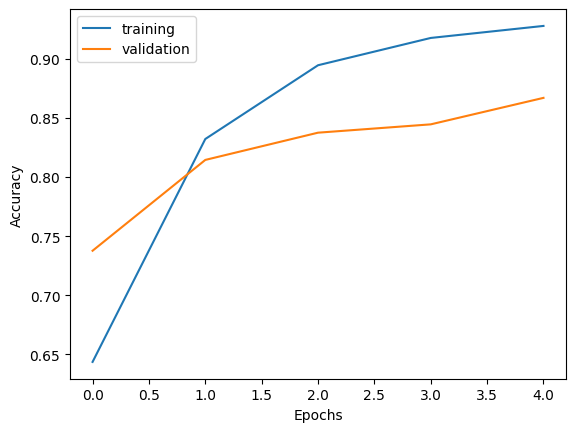

In [ ]:
# Plot the training and validation accuracy

plt.plot(history.epoch, history.history['accuracy'],label='training')
plt.plot(history.epoch, history.history['val_accuracy'],label='validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')